In [ ]:
import pandas as pd
# Read the dataset
data = pd.read_csv('/content/data.csv')
data.head()

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,0
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,1
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,0
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,0
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,1


In [ ]:
data.describe()

,AcountNumber,CVV,CardInformation,CustomerAge,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
count,3.709700e+04,37097.000000,37097.000000,28246.000000,37097.000000,3.709700e+04,37097.000000,37097.000000,37097.000000,3.709700e+04,37097.000000,37097.000000
mean,1.264835e+09,443.595897,559543.728873,39.157509,140870.690352,2.452101e+06,335101.221123,550260.997736,227386.956492,2.948066e+05,350202.783028,0.737796
std,1.478694e+07,135.223267,133128.958922,20.063996,13803.627460,1.066814e+06,169488.715096,260629.814049,78977.053916,6.239614e+05,144781.945405,0.439839
min,1.239297e+09,211.000000,329328.000000,18.000000,120000.000000,1.200000e+06,150000.000000,100003.000000,100017.000000,-8.973780e+05,100001.000000,0.000000
25%,1.251999e+09,327.000000,443420.000000,23.000000,120000.000000,2.000000e+06,200000.000000,324480.000000,161178.000000,-2.398140e+05,224577.000000,0.000000
50%,1.264885e+09,443.000000,560072.000000,29.000000,150000.000000,2.000000e+06,200000.000000,550293.000000,222530.000000,2.154320e+05,348916.000000,1.000000
75%,1.277613e+09,561.000000,675257.000000,55.000000,150000.000000,4.000000e+06,500000.000000,775075.000000,283447.000000,8.509920e+05,477291.000000,1.000000
max,1.290470e+09,678.000000,789366.000000,85.000000,150000.000000,4.000000e+06,600000.000000,999956.000000,399971.000000,1.591355e+06,599990.000000,1.000000


In [ ]:
data.isnull().sum()

AcountNumber                    0
CVV                             0
CardInformation                 0
CustomerAge                  8851
Gender                          0
Marital Status                  0
Cards                           0
CardColour                      0
CardType                        0
TransactionType                 0
Domain                          0
ATM                             0
POSWEBLimit                     0
CreditLimit                     0
Amount                          0
AverageIncomeExpendicture       0
NewBalance                      0
OldBalance                      0
Outcome                         0
dtype: int64

In [ ]:
# Calculate the median age
median_age = data['CustomerAge'].median()

# Replace missing values with the median age
data['CustomerAge'].fillna(median_age, inplace=True)



data['CustomerAge'].fillna(median_age, inplace=True)

# Verify that there are no more null values
print("Null value counts after fixing CustomerAge:")
print(data.isnull().sum())

Null value counts after fixing CustomerAge:
AcountNumber                 0
CVV                          0
CardInformation              0
CustomerAge                  0
Gender                       0
Marital Status               0
Cards                        0
CardColour                   0
CardType                     0
TransactionType              0
Domain                       0
ATM                          0
POSWEBLimit                  0
CreditLimit                  0
Amount                       0
AverageIncomeExpendicture    0
NewBalance                   0
OldBalance                   0
Outcome                      0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for numerical and categorical features
numerical_features = ['CustomerAge', 'POSWEBLimit', 'CreditLimit', 'Amount', 'AverageIncomeExpendicture', 'NewBalance', 'OldBalance']
categorical_features = ['Gender', 'Marital Status', 'Cards', 'CardColour', 'CardType', 'TransactionType', 'Domain', 'ATM']

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # impute missing values with median
    ('scaler', MinMaxScaler())  # scale features to [0, 1] range
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # one-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the entire dataset
preprocessed_data = preprocessor.fit_transform(data)

# Convert the preprocessed data back to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)

# Print the preprocessed DataFrame
print(preprocessed_df)


             0         1         2         3         4         5         6   \
0      0.149254  0.285714  0.777778  0.032534  0.236376  0.545437  0.461584   
1      0.104478  0.285714  0.111111  0.527118  0.764571  0.415337  0.454112   
2      0.044776  1.000000  0.777778  0.100853  0.643115  0.540988  0.316467   
3      0.119403  1.000000  0.777778  0.033771  0.151447  0.493202  0.199354   
4      0.149254  0.285714  0.777778  0.650192  0.653344  0.759024  0.412977   
...         ...       ...       ...       ...       ...       ...       ...   
37092  0.656716  0.285714  0.777778  0.483147  0.327217  0.679690  0.318759   
37093  0.029851  0.285714  0.777778  0.087671  0.157077  0.548751  0.378834   
37094  0.731343  1.000000  0.000000  0.224002  0.522737  0.515583  0.997212   
37095  0.597015  0.285714  0.777778  0.125365  0.044747  0.616047  0.645956   
37096  0.134328  1.000000  0.777778  0.037565  0.571324  0.652213  0.984012   

        7    8    9   ...   17   18   19   20   21 

In [ ]:
data.head()

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000.0,2000000.0,500000.0,129282.0,170919.0,460070.0,330788.0,0.0
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000.0,2000000.0,200000.0,574384.0,329353.0,136286.0,327052.0,1.0
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000.0,4000000.0,500000.0,190766.0,292922.0,448997.0,258231.0,0.0
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000.0,4000000.0,500000.0,130395.0,145444.0,330071.0,199676.0,0.0
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000.0,2000000.0,500000.0,685145.0,295990.0,991630.0,306485.0,1.0


In [ ]:
import pandas as pd
# Calculate the difference between NewBalance and OldBalance
data['BalanceChange'] = data['NewBalance'] - data['OldBalance']

# Create a new feature representing the ratio of Amount to CreditLimit
data['AmountToCreditLimitRatio'] = data['Amount'] / data['CreditLimit']

# Convert Gender to binary encoding (1 for Male, 0 for Female)
data['IsMale'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Drop the original columns used to create new features
data.drop(['NewBalance', 'OldBalance', 'Gender'], axis=1, inplace=True)

# Print the updated DataFrame with new features
print(data.head())

   AcountNumber  CVV  CardInformation  CustomerAge Marital Status   Cards  \
0    1275734409  364           755189         28.0        Married   Debit   
1    1271246193  401           513706         25.0         Single   Debit   
2    1242290165  266           648473         21.0        Married  Credit   
3    1245478185  402           416049         26.0        Unknown  Credit   
4    1258212072  334           459937         28.0        Married   Debit   

  CardColour CardType TransactionType         Domain     ATM  POSWEBLimit  \
0       Gold    Verve          Credit          Local  150000      2000000   
1       Gold    Verve           Debit  International  150000      2000000   
2      White     Visa          Credit  International  120000      4000000   
3      White     Visa          Credit          Local  120000      4000000   
4       Gold    Verve          Credit  International  150000      2000000   

   CreditLimit  Amount  AverageIncomeExpendicture  Outcome  BalanceChange 

In [ ]:

# List of columns to remove
#unwanted_columns = ['AcountNumber', 'CVV', 'CardInformation', 'Marital Status', 'CardColour', 'Domain']

# Remove unwanted columns
#data_cleaned = data.drop(columns=unwanted_columns)

# Print the first few rows of the cleaned data
#print(data_cleaned.head())

# Save the cleaned dataset to a new CSV file
#data_cleaned.to_csv('/content/newdata.csv', index=False)




In [ ]:
data.loc[data.Outcome == 0, 'Outcome']=0
data.loc[data.Outcome == 1, 'Outcome']=1

data["Outcome"].value_counts().values

array([27370,  9727])

In [ ]:
# Filter the dataset to include only fraudulent transactions
fraudulent_transactions = data[data['Outcome'] == 1]

# Calculate the minimum and maximum amounts for fraudulent transactions
min_fraud_amount = fraudulent_transactions['Amount'].min()
max_fraud_amount = fraudulent_transactions['Amount'].max()

# Display the minimum and maximum amounts for fraudulent transactions
print("Minimum amount for fraudulent transactions:", min_fraud_amount)
print("Maximum amount for fraudulent transactions:", max_fraud_amount)

# Filter the DataFrame for non-fraudulent transactions
non_fraudulent_transactions = data[data['Outcome'] == 0]

# Calculate the minimum and maximum amounts of non-fraudulent transactions where fraud occurred
min_non_fraud_amount = non_fraudulent_transactions['Amount'].min()
max_non_fraud_amount = non_fraudulent_transactions['Amount'].max()

# Display the minimum and maximum amounts of non-fraudulent transactions where fraud occurred
print("Minimum amount of a non-fraudulent transaction where fraud occurred:", min_non_fraud_amount)
print("Maximum amount of a non-fraudulent transaction where fraud occurred:", max_non_fraud_amount)


Minimum amount for fraudulent transactions: 150070
Maximum amount for fraudulent transactions: 999956
Minimum amount of a non-fraudulent transaction where fraud occurred: 100003
Maximum amount of a non-fraudulent transaction where fraud occurred: 599320


In [ ]:
# Calculate the proportion of fraudulent transactions based on TransactionType
fraud_by_transaction_type = data.groupby('TransactionType')['Outcome'].mean()

# Print the result
print(fraud_by_transaction_type)


TransactionType
Credit    0.528360
Debit     0.907118
Name: Outcome, dtype: float64


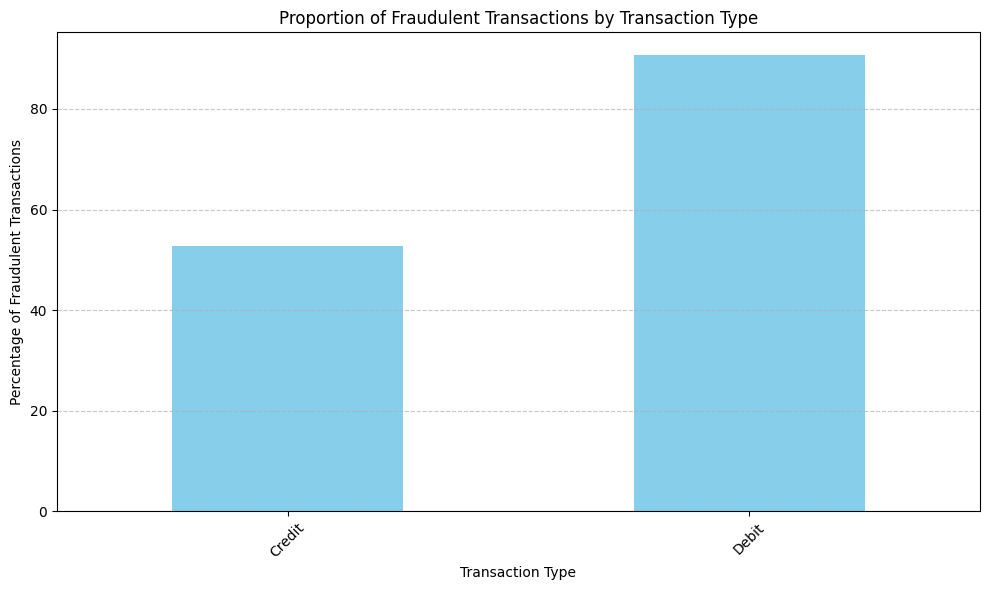

Proportion of Fraudulent Transactions by Transaction Type:
TransactionType
Credit    52.836039
Debit     90.711844
Name: Outcome, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of fraudulent transactions based on TransactionType
fraud_by_transaction_type = data.groupby('TransactionType')['Outcome'].mean() * 100

# Plot the results
plt.figure(figsize=(10, 6))
fraud_by_transaction_type.plot(kind='bar', color='skyblue')
plt.title('Proportion of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the result
print("Proportion of Fraudulent Transactions by Transaction Type:")
print(fraud_by_transaction_type)


## **High Percentage of Fraud has occured mostly in Debit Transaction**##







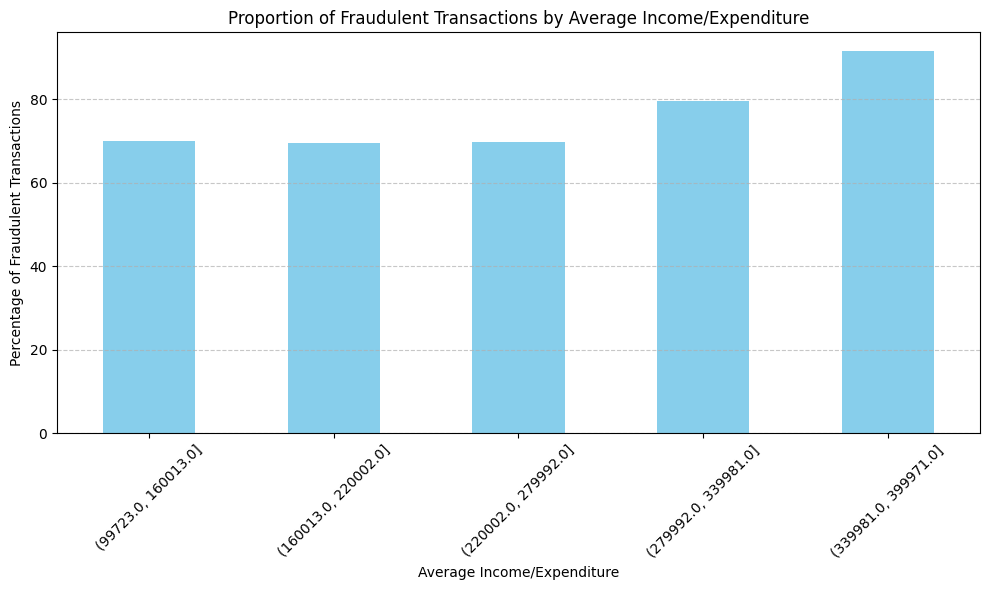

Proportion of Fraudulent Transactions by Average Income/Expenditure:
AverageIncomeExpendicture
(99723.0, 160013.0]     69.946809
(160013.0, 220002.0]    69.518987
(220002.0, 279992.0]    69.821696
(279992.0, 339981.0]    79.638490
(339981.0, 399971.0]    91.507353
Name: Outcome, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of fraudulent transactions based on AverageIncomeExpendicture
fraud_by_income = data.groupby(pd.cut(data['AverageIncomeExpendicture'], bins=5, precision=0))['Outcome'].mean() * 100

# Plot the results
plt.figure(figsize=(10, 6))
fraud_by_income.plot(kind='bar', color='skyblue')
plt.title('Proportion of Fraudulent Transactions by Average Income/Expenditure')
plt.xlabel('Average Income/Expenditure')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the result
print("Proportion of Fraudulent Transactions by Average Income/Expenditure:")
print(fraud_by_income)


In [ ]:


data = pd.get_dummies(data, columns=['Marital Status','Cards','CardColour','CardType','TransactionType','Domain','Outcome'], drop_first=True)

In [ ]:
data.head()

,AcountNumber,CVV,CardInformation,CustomerAge,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,BalanceChange,...,Marital Status_Single,Marital Status_Unknown,Cards_Debit,Cards_Prepaid,CardColour_White,CardType_Verve,CardType_Visa,TransactionType_Debit,Domain_Local,Outcome_1
0,1275734409,364,755189,28.0,150000,2000000,500000,129282,170919,129282,...,False,False,True,False,False,True,False,False,True,False
1,1271246193,401,513706,25.0,150000,2000000,200000,574384,329353,-190766,...,True,False,True,False,False,True,False,True,False,True
2,1242290165,266,648473,21.0,120000,4000000,500000,190766,292922,190766,...,False,False,False,False,True,False,True,False,False,False
3,1245478185,402,416049,26.0,120000,4000000,500000,130395,145444,130395,...,False,True,False,False,True,False,True,False,True,False
4,1258212072,334,459937,28.0,150000,2000000,500000,685145,295990,685145,...,False,False,True,False,False,True,False,False,False,True


In [ ]:

# Calculate the count of each unique value in the Outcome column
outcome_counts = data['Outcome_1'].value_counts()

# Print the results
print("Count of 0 (Non-Fraud):", outcome_counts[0])
print("Count of 1 (Fraud):", outcome_counts[1])

Count of 0 (Non-Fraud): 27370
Count of 1 (Fraud): 9727


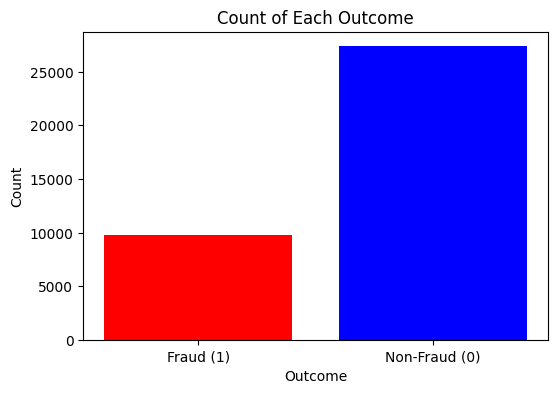

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each unique value in the Outcome column
outcome_counts = data['Outcome_1'].value_counts()

# Set up the plot
plt.figure(figsize=(6, 4))

# Create a bar plot
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Each Outcome')

# Customize x-axis tick labels
plt.xticks(outcome_counts.index, ['Non-Fraud (0)', 'Fraud (1)'])

# Show plot
plt.show()




In [ ]:

#balanced_data.to_csv('balanced_data.csv', index=False)

In [ ]:
data.columns

In [ ]:

print("Number of rows and columns in the dataset:")
print(data.shape)
print("\nDataset:")
print(data.head())

Number of rows and columns in the dataset:
(37097, 23)

Dataset:
   AcountNumber  CVV  CardInformation  CustomerAge     ATM  POSWEBLimit  \
0    1275734409  364           755189         28.0  150000      2000000   
1    1271246193  401           513706         25.0  150000      2000000   
2    1242290165  266           648473         21.0  120000      4000000   
3    1245478185  402           416049         26.0  120000      4000000   
4    1258212072  334           459937         28.0  150000      2000000   

   CreditLimit  Amount  AverageIncomeExpendicture  BalanceChange  ...  \
0       500000  129282                     170919         129282  ...   
1       200000  574384                     329353        -190766  ...   
2       500000  190766                     292922         190766  ...   
3       500000  130395                     145444         130395  ...   
4       500000  685145                     295990         685145  ...   

   Marital Status_Single  Marital Status_Unkn

In [ ]:
#y = data['Outcome_1']
#X = data.drop(['Outcome_1'],axis =1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = data.iloc[:,:-1].values
y= data.iloc[:,-1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 50)

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Logistics Regression Algorithm**

In [ ]:

# Initialize and train the Logistic Regression model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train_scaled, y_train)

# Predict the test set results
pred = logmodel.predict(X_test_scaled)

# Calculate accuracy
logmodel_accuracy = round(accuracy_score(y_test, pred) * 100, 2)
print(f"Logistic Regression Accuracy: {logmodel_accuracy}%")

# Calculate confusion matrix
conf_mat_logmodel = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_mat_logmodel)

# Extract values from the confusion matrix
TruePositive_log = conf_mat_logmodel[1, 1]
FalsePositive_log = conf_mat_logmodel[0, 1]
FalseNegative_log = conf_mat_logmodel[1, 0]
TrueNegative_log = conf_mat_logmodel[0, 0]

# Calculate precision, recall, and F1-score
Precision_log = precision_score(y_test, pred)
p_log = round(Precision_log * 100, 2)

Recall_log = recall_score(y_test, pred)
R_log = round(Recall_log * 100, 1)

F1_score_log = f1_score(y_test, pred)
F1_log = round(F1_score_log * 100, 1)

print(f"Precision: {p_log}%")
print(f"Recall: {R_log}%")
print(f"F1 Score: {F1_log}%")


Logistic Regression Accuracy: 99.74%
Confusion Matrix:
 [[1936    9]
 [  10 5465]]
Precision: 99.84%
Recall: 99.8%
F1 Score: 99.8%


# **Radom Forest Algorithm**

In [ ]:

# Initialize and train the Random Forest model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfmodel.fit(X_train_scaled, y_train)

# Predict the test set results
rf_pred = rfmodel.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = round(accuracy_score(y_test, rf_pred) * 100, 2)
print(f"Random Forest Accuracy: {rf_accuracy}%")

# Calculate confusion matrix
conf_mat_rfmodel = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_mat_rfmodel)

# Extract values from the confusion matrix
TruePositive_rf = conf_mat_rfmodel[1, 1]
FalsePositive_rf = conf_mat_rfmodel[0, 1]
FalseNegative_rf = conf_mat_rfmodel[1, 0]
TrueNegative_rf = conf_mat_rfmodel[0, 0]

# Calculate precision, recall, and F1-score
Precision_rf = precision_score(y_test, rf_pred)
p_rf = round(Precision_rf * 100, 2)

Recall_rf = recall_score(y_test, rf_pred)
R_rf = round(Recall_rf * 100, 1)

F1_score_rf = f1_score(y_test, rf_pred)
F1_rf = round(F1_score_rf * 100, 1)

print(f"Precision: {p_rf}%")
print(f"Recall: {R_rf}%")
print(f"F1 Score: {F1_rf}%")


Random Forest Accuracy: 100.0%
Confusion Matrix:
 [[1945    0]
 [   0 5475]]
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


# **K-Nearest Neighbors Algorithm**

In [ ]:

# Initialize and train the KNN model
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnmodel.fit(X_train_scaled, y_train)

# Predict the test set results
knn_pred = knnmodel.predict(X_test_scaled)

# Calculate accuracy
knn_accuracy = round(accuracy_score(y_test, knn_pred) * 100, 2)
print(f"KNN Accuracy: {knn_accuracy}%")

# Calculate confusion matrix
conf_mat_knnmodel = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n", conf_mat_knnmodel)

# Extract values from the confusion matrix
TruePositive_knn = conf_mat_knnmodel[1, 1]
FalsePositive_knn = conf_mat_knnmodel[0, 1]
FalseNegative_knn = conf_mat_knnmodel[1, 0]
TrueNegative_knn = conf_mat_knnmodel[0, 0]

# Calculate precision, recall, and F1-score
Precision_knn = precision_score(y_test, knn_pred)
p_knn = round(Precision_knn * 100, 2)

Recall_knn = recall_score(y_test, knn_pred)
R_knn = round(Recall_knn * 100, 1)

F1_score_knn = f1_score(y_test, knn_pred)
F1_knn = round(F1_score_knn * 100, 1)

print(f"Precision: {p_knn}%")
print(f"Recall: {R_knn}%")
print(f"F1 Score: {F1_knn}%")


KNN Accuracy: 93.36%
Confusion Matrix:
 [[1621  324]
 [ 169 5306]]
Precision: 94.25%
Recall: 96.9%
F1 Score: 95.6%


In [ ]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','K-Nearest Neighbor'],
    'Score': [logmodel_accuracy,  rf_accuracy,knn_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()


,Score,Model
0,100.00,Random Forest
1,99.74,Logistic Regression
2,93.36,K-Nearest Neighbor


In [ ]:
Precision_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','K-Nearest Neighbor'],
    'Score': [p_log,p_rf, p_knn]})
Precision_Comparison_df = Precision_Comparison.sort_values(by='Score', ascending=False)
Precision_Comparison_df = Precision_Comparison_df.set_index('Score')
Precision_Comparison_df.reset_index()

,Score,Model
0,100.00,Random Forest
1,99.84,Logistic Regression
2,94.25,K-Nearest Neighbor


In [ ]:
Recall_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbor'],
    'Score': [R_log, R_rf, R_knn  ]})
Recall_Comparison_df = Recall_Comparison.sort_values(by='Score', ascending=False)
Recall_Comparison_df = Recall_Comparison_df.set_index('Score')
Recall_Comparison_df.reset_index()

,Score,Model
0,100.0,Random Forest
1,99.8,Logistic Regression
2,96.9,K-Nearest Neighbor


In [ ]:
F1_score_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbor'],
    'Score': [F1_log,F1_rf,F1_knn]})
F1_score_Comparison_df = F1_score_Comparison.sort_values(by='Score', ascending=False)
F1_score_Comparison_df = F1_score_Comparison_df.set_index('Score')
F1_score_Comparison_df.reset_index()

,Score,Model
0,100.0,Random Forest
1,99.8,Logistic Regression
2,95.6,K-Nearest Neighbor


<Axes: xlabel='Model', ylabel='Score'>

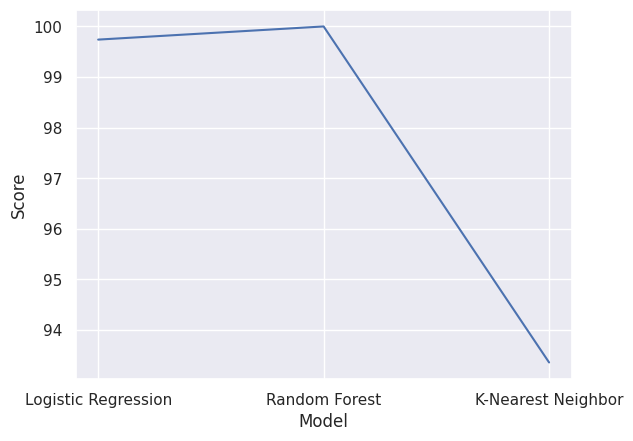

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
graph=sns.lineplot(x='Model', y='Score',data=Model_Comparison)
graph

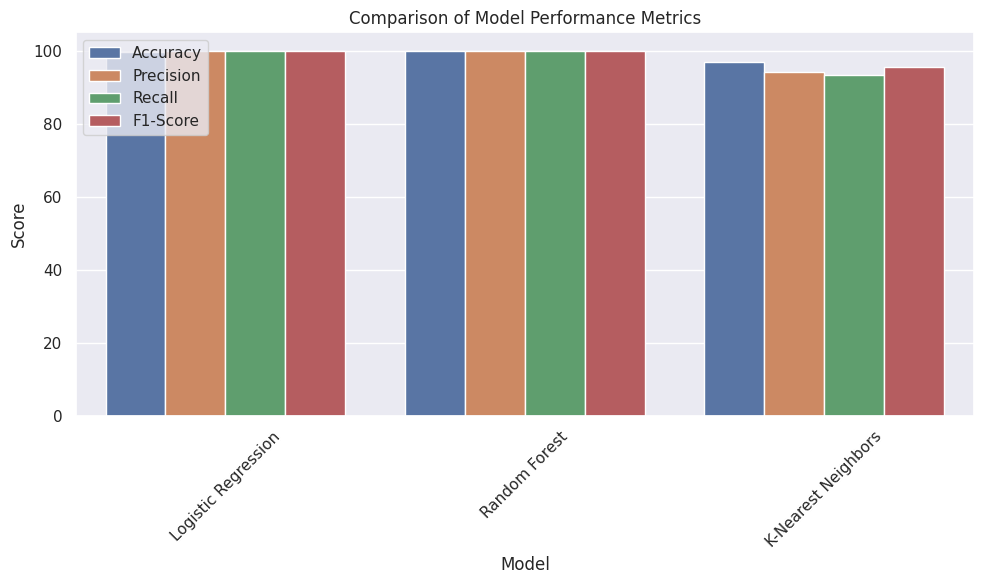

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']

# Define the metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define the corresponding metric values for each model
accuracy_values = [logmodel_accuracy, rf_accuracy, knn_accuracy]
precision_values = [p_log, p_rf, p_knn]
recall_values = [R_log, R_rf, R_knn]
f1_scores_values = [F1_log, F1_rf, F1_knn]

# Create a DataFrame for the metrics
data = pd.DataFrame({
    'Model': models * len(metrics),
    'Metric': metrics * len(models),
    'Value': accuracy_values + precision_values + recall_values + f1_scores_values
})

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the grouped bar plot
sns.barplot(data=data, x='Model', y='Value', hue='Metric')

# Add title and labels
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Random Forest Model has shown high accuracy rate

In [ ]:
# prompt: save the model using pickle

import pickle

# Save the Random Forest model to a file
pickle.dump(rfmodel, open("rfmodel.sav", 'wb'))
